In [ ]:
Spotify 사용 데이터를 이용한 데이터 분석 : 1년치 플레이한 기록으로 앞으로 나에게 추천할 노래가 무엇일까
>Spotify는 어떤 회사보다 사용자 데이터를 중요시한 회사였기에 이들의 데이터를 분석해보고 싶었습니다.
>또 매년 사용자들에게 연말정산 느낌의 데이터를 제공하여 점점 하나의 문화로 자리잡고 있습니다. > 실제 저의 2022 Spotify Wrapped 플레이리스트와 비교해보았습니다.
>사용한 자료는 실제로 제가 스포티파이를 이용한 기록을 스포티파이에 요청하여 받았습니다.
>스포티파이에서 제공하는 자료는 실행 날짜와 시간, 가수이름, 노래제목, 실행시간뿐이기 때문에 이를 최대한 활용해 분석해보았습니다.(노래 장르 등이 포함되지 않아 아쉬웠습니다.)
>데이터 자료는 2022년 1월 2일부터 11월 3일까지의 자료를 사용하였습니다.(앞선 2021년 데이터 제외시킴)

분석 데이터 셋이 같이 제출이 되지 않은 경우를 대비하여 여기에 구글드라이브 주소를 남겨놓겠습니다. 감사합니다.
사용한 데이터: https://drive.google.com/file/d/1B4eXP-R8pgi3BOCfDS207ReiW0eUmxlZ/view?usp=sharing

분석결과는 맨 아래에 있습니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts

In [ ]:
df = pd.read_json('/content/StreamingHistory0.json', encoding='utf-8')

In [ ]:
df2 = df.drop(labels=range(0, 601), axis=0)
df2.head()

,endTime,artistName,trackName,msPlayed
601,2022-01-02 13:31,Virginia To Vegas,Malibu,148821
602,2022-01-02 13:33,Virginia To Vegas,Palm Springs (the way you made me feel),169941
603,2022-01-02 13:36,Virginia To Vegas,Just Friends,168951
604,2022-01-02 13:39,SEVENTEEN,Mansae,137441
605,2022-01-02 13:42,SEVENTEEN,Don't Wanna Cry,175458


In [ ]:
df2['endTime'] = pd.to_datetime(df2['endTime'])
df2.set_index('endTime', inplace = True)

df2['qualify'] = df2['msPlayed'].apply(lambda x: 1 if x >= 30_000 else 0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9399 entries, 2022-01-02 13:31:00 to 2022-11-03 01:24:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artistName  9399 non-null   object
 1   trackName   9399 non-null   object
 2   msPlayed    9399 non-null   int64 
 3   qualify     9399 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 367.1+ KB


In [ ]:
df.tail()

,endTime,artistName,trackName,msPlayed
9995,2022-11-03 01:05,Kelly Clarkson,Wrapped in Red,216906
9996,2022-11-03 01:09,Wham!,Last Christmas,262960
9997,2022-11-03 01:12,A Great Big World,Wrap Me Up Under the Christmas Tree,194360
9998,2022-11-03 01:21,TWICE,Merry & Happy,192573
9999,2022-11-03 01:24,Kelly Clarkson,Christmas Eve,180890


In [ ]:
print('Min date: {}'.format(df2.index.min()))
print('Max date: {}'.format(df2.index.max()))

Min date: 2022-01-02 13:31:00
Max date: 2022-11-03 01:24:00


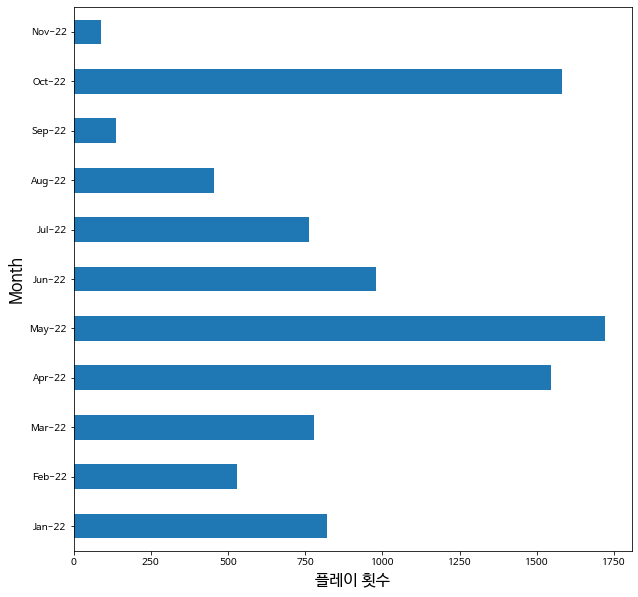

In [ ]:
monthly_play_counts = df2['msPlayed'].resample('MS').count()
column_names = monthly_play_counts.index

plt.rc('font',family='NanumBarunGothic')
fig, ax = plt.subplots(1,1,figsize=(10,10))
g = monthly_play_counts.plot(kind = 'barh', ax = ax)

g.set_yticklabels([m.strftime('%b-%y') for m in column_names])
ax.set_xlabel('플레이 횟수', fontsize = 16)
ax.set_ylabel('Month', fontsize = 16)
plt.show()

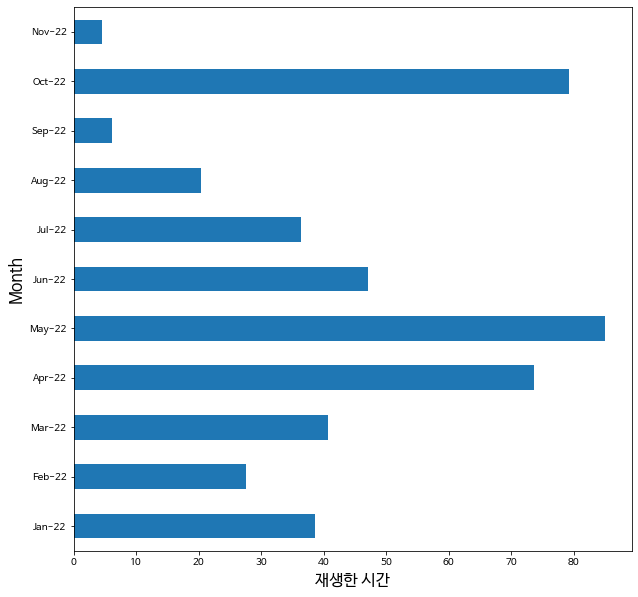

In [ ]:
monthly_hours_played = df2['msPlayed'].resample('MS').sum() / 60_000 / 60
column_names = monthly_hours_played.index

fig, ax = plt.subplots(1,1,figsize=(10,10))
g = monthly_hours_played.plot(kind = 'barh', ax = ax)

g.set_yticklabels([m.strftime('%b-%y') for m in column_names])
ax.set_xlabel('재생한 시간', fontsize = 16)
ax.set_ylabel('Month', fontsize = 16)
plt.show()

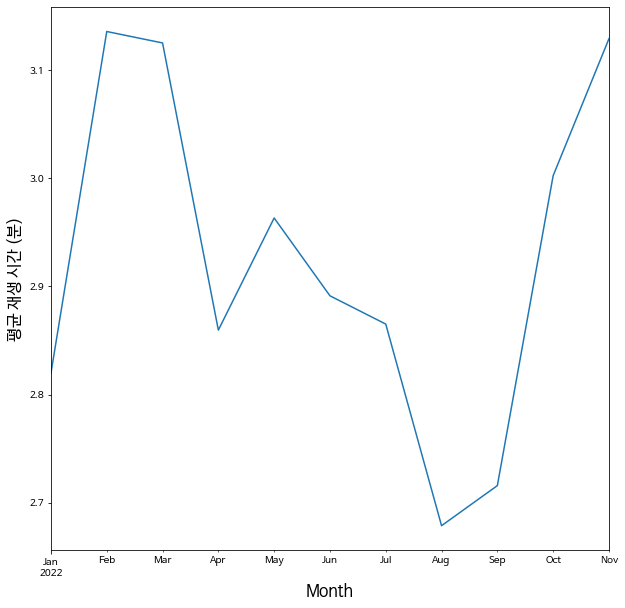

In [ ]:
monthly_mean_song_playtime = df2['msPlayed'].resample('MS').mean() / 60_000

column_names = monthly_mean_song_playtime.index

fig, ax = plt.subplots(1,1,figsize=(10,10))
g = monthly_mean_song_playtime.plot(kind = 'line', ax = ax)

ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('평균 재생 시간 (분)', fontsize = 16)
plt.show()

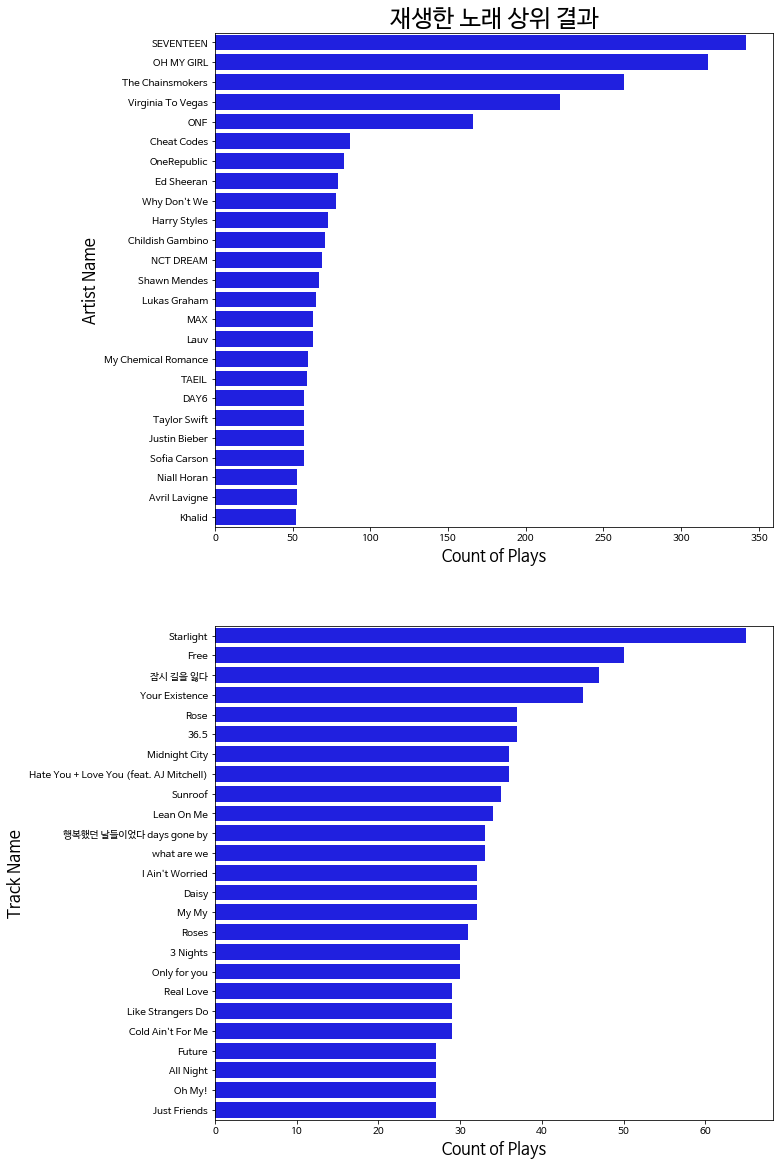

In [ ]:
artist_volume = df2.groupby(['artistName'], as_index = False).agg({'msPlayed':'count'}).sort_values(by='msPlayed', ascending = False).head(25)
song_volume = df2.groupby(['trackName'], as_index = False).agg({'msPlayed':'count'}).sort_values(by='msPlayed', ascending = False).head(25)


fig, ax = plt.subplots(2,1, figsize=(10,20))
plt.rc('font',family='NanumBarunGothic')
g1 = sns.barplot(x = 'msPlayed', y = 'artistName', orient = 'h', data = artist_volume, ax = ax[0], color = 'blue')
g2 = sns.barplot(x = 'msPlayed', y = 'trackName', orient = 'h', data = song_volume, ax = ax[1], color = 'blue')


g1.set_title('재생한 노래 상위 결과', fontsize = 24)
ax[0].set_xlabel('Count of Plays', fontsize = 16)
ax[0].set_ylabel('Artist Name', fontsize = 16)

ax[1].set_xlabel('Count of Plays', fontsize = 16)
ax[1].set_ylabel('Track Name', fontsize = 16)

plt.show()

In [ ]:
df3=df
df3['Skipped'] = df3['msPlayed'] < 1000 * 30
df3.head()

,endTime,artistName,trackName,msPlayed,Skipped
0,2021-11-03 18:02,SEVENTEEN,Adore U,56447,False
1,2021-12-03 00:01,NCT DREAM,Dive Into You,192707,False
2,2021-12-04 13:32,Conan Gray,Overdrive,139546,False
3,2021-12-04 13:35,EXO,Don't fight the feeling,176448,False
4,2021-12-04 13:38,NS Yoon-G,If You Love Me (Feat. JOOHONEY (MONSTA X)),199940,False


In [ ]:
grp = df3.groupby(['artistName', 'trackName'])

df_agg = (grp['Skipped'].sum() / grp.size()) [grp.size() > 15]

df_agg.sort_values(ascending=False).head(10)

artistName           trackName                              
FINNEAS              Let's Fall in Love for the Night           0.230769
Ritt Momney          Put Your Records On                        0.217391
Oceans               Cold Ain't For Me                          0.206897
Shawn Mendes         If I Can't Have You                        0.200000
Caesars              Jerk It Out                                0.200000
JVKE                 this is what falling in love feels like    0.190476
Avril Lavigne        Sk8er Boi                                  0.187500
NOTD                 Keep You Mine                              0.187500
My Chemical Romance  Welcome to the Black Parade                0.166667
Virginia To Vegas    Malibu                                     0.157895
dtype: float64

In [ ]:
is_current_song_skipped = ~df3['Skipped']
was_previous_song_skipped = df3['Skipped'].shift(1)
m = is_current_song_skipped & was_previous_song_skipped

df_skipped_to = df3[m]

grp = df_skipped_to.groupby(['artistName', 'trackName'])

agg = grp.size()
agg.sort_values(ascending=False).head(10)

artistName         trackName                              
Cheat Codes        Hate You + Love You (feat. AJ Mitchell)    8
TAEIL              Starlight                                  7
Oceans             Cold Ain't For Me                          6
MAX                Still New York (feat. Joey Bada$$)         6
IVE                After LIKE                                 6
Girls' Generation  FOREVER 1                                  5
Why Don't We       Lotus Inn                                  5
Wonstein           Your Existence                             4
Virginia To Vegas  betterman                                  4
Xydo               Free                                       4
dtype: int64

In [ ]:
df3['endTime'] = pd.to_datetime(df3['endTime'])
ddf_played = df3[df3['Skipped'] == False]
times = ddf_played['endTime'].dt.time

In [ ]:
def time_and_day(df3, time, day):    
    df_played = df3[df3['Skipped'] == False] 
    times = df_played['endTime'].dt.time
    
    if time.lower() == 'morning':
        start = "06:00:00"
        end = "11:59:59"
    elif time.lower() == 'afternoon':
        start = "11:59:59"
        end = "17:59:59"        
    elif time.lower() == 'evening':
        start = "17:59:59"
        end = "23:59:59"
    elif time.lower() == 'night':
        start = "00:00:00"
        end = "05:59:59"
    else:
        return "error!!! options are 'morning', 'afternoon', 'evening', 'night'"
        
    mask = (df_played['endTime'].dt.day_name() == day) & (times > pd.to_datetime(start).time()) & (times <= pd.to_datetime(end).time())
    df_calc = df_played[mask]

    grouped = df_calc.groupby(['artistName', 'trackName'])
    aggr = grouped.size()
    return aggr.sort_values(ascending=False).head(10)

In [ ]:
time_and_day(df3, 'morning', 'Monday')

artistName        trackName                                 
IVE               LOVE DIVE                                     4
Maggie Lindemann  Pretty Girl - Cheat Codes X CADE Remix        4
The Script        Hall of Fame (feat. will.i.am)                4
Jay Sean          Down                                          4
NS Yoon-G         If You Love Me (Feat. JOOHONEY (MONSTA X))    4
Galantis          Bones (feat. OneRepublic)                     3
Merk & Kremont    Hands Up (feat. DNCE)                         3
Why Don't We      Fallin’ (Adrenaline)                          3
ROSÉ              On The Ground                                 3
The Wanted        Glad You Came                                 3
dtype: int64

In [ ]:
time_and_day(df, 'afternoon', 'Thursday')

artistName       trackName           
Auli'i Cravalho  How Far I'll Go         7
PRETTYMUCH       On My Way               4
SEVENTEEN        HIT                     4
                 My My                   4
                 Oh My!                  4
TAEIL            Starlight               3
SEVENTEEN        A-TEEN                  3
KEY              I Wanna Be              3
Weeekly          After School            3
O3ohn            Milky Way Between Us    3
dtype: int64

분석결과:
1. 이번년도 5월에 가장 많이 플레이했음을 알 수 있었다. 이것에 비례하여 가장 많은 시간을 들었던 달도 5월로 나타났음_5월 이후로 유튜브 뮤직을 사용하기 시작해 감소추세가 보임,   
   10월엔 헬스장을 다니며 애플워치만으로 재생할 수 있는 Spotify로 매일 1시간씩 헬스장에서 러닝하면서 듣다보니 10월에 다시 사용횟수가 증가했음  
     < 이러한 사실을 스포티파이가 파악한다면 운동용 플레이리스트 제공에 더 힘쓸 것으로 분석

2. 평균 재생 시간을 달별로 살펴보았을 때 듣지 않고 다음 노래로 스킵한 정도를 달별로 살펴볼 수 있었다. 8,9월에 다음 노래로 스킵하면서 많이 들었던 것으로 분석

3. 1년동안 가장 많이 플레이한 가수는 세븐틴으로 나타났고 이에 따라 스포티파이에서 세븐틴의 노래를 더 많이 추천할 것으로 분석   
  +나머지 상위 4명 가수가 오마이걸, the chainsmkers, Virginia to Vegas, ONF 순인 것으로 나타남  
     < 압도적 상위 5명 가수 안에 kpop 그룹이 3그룹이나 되므로 앞으로 kpop을 많이 포함한 나만의 플레이리스트를 제공할 것으로 분석

4. 이번년도 스포티파이에서 제공한 Spotify Wrapped 2022년에 즐겨 듣던 곡 리스트와 내 데이터로 분석한 재생한 곡 상위 결과를 비교 했을 때 유사함,  
   그리고 나의 최애 아티스트는 나의 분석결과와 스포티파이의 분석과 동일하다.  
(본 분석에서는 11월 3일 까지의 자료를 사용했기 때문에 실제 스포티파이가 제공한 플레이리스트와 오차가 있음)  
다음은 스포티파이의 이번년도 분석이다.  
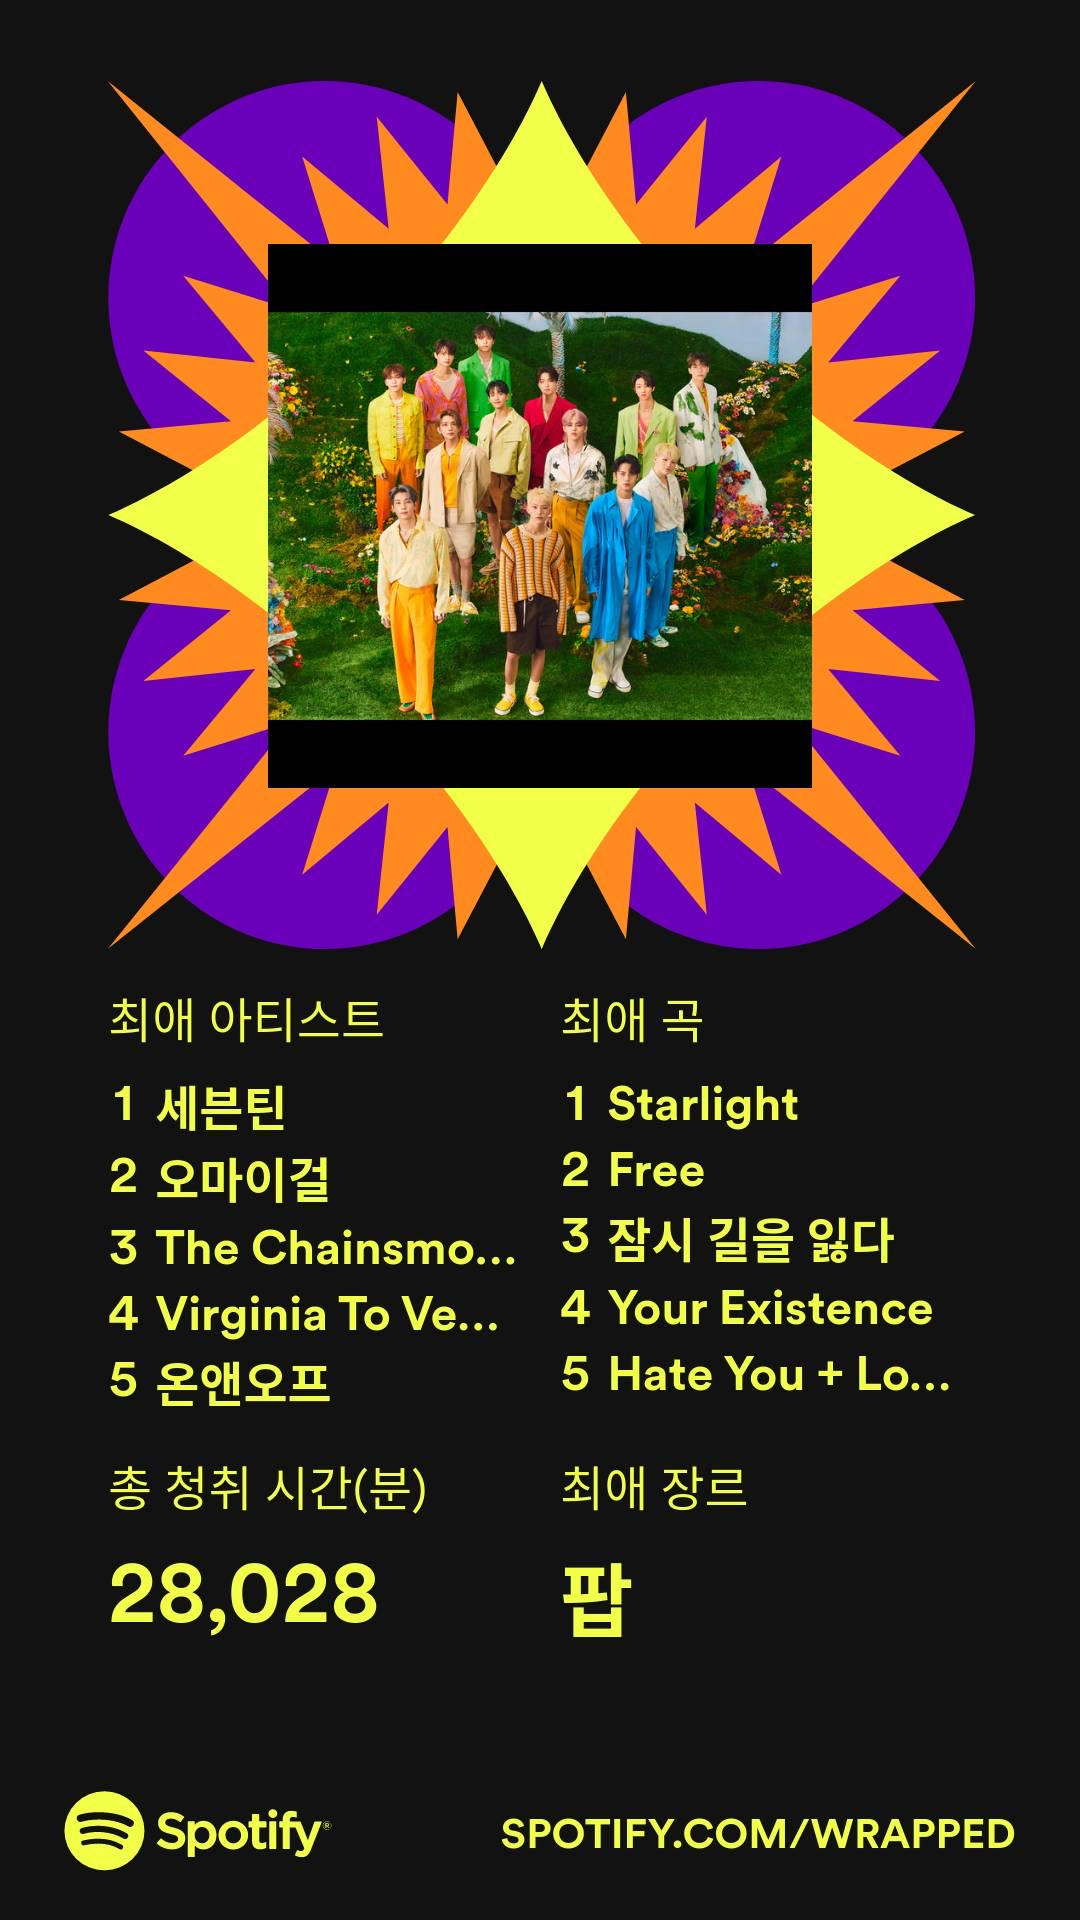

5. 내가 많이 스킵했던 노래도 분석해보았다. msPlayed를 기준으로 30000위 아래로 나누어 보았다.   
   플레이한 횟수에 비하면 스킵 횟수는 그렇게 크지 않았지만   
   내가 좋아요를 누른 노래들의 재생목록에 있는 노래들이 많은 것으로 보아 항상 플레이를 누르면 상위곡부터 재생되어 너무 많이 들어서 질려 스킵한 것이 아닐까 분석 

6. 들은 시간을 바탕으로 어떤 곡을 무슨 요일, 어떤 시간대에 들었는지 분석해보았다. 시간대는 아침(6-12시), 오후(12-18시), 저녁(18-24시), 야간(24-6시)으로 나누어 보았다.  
   상위 10곡이 나오도록 함수를 만들었고 그 결과 월요일 아침에는 노래 장르가 다양한 것으로 보아 플레이 리스트를 틀어놨음을 알 수 있었고  
   목요일 오후에는 비트감이 있는 kpop곡들, 특히 세븐틴 노래가 많은 것으로 보아 이 시간대에는 비트감 있는 노래를 들으며 일을 했음을 알 수 있었다.   
< 오전에는 다른 사람들이 주로 듣는 플레이리스트를 추천해줄 것으로 예상하고 오후에는 비트감있는 kpop을 추천해줄 것으로 예상